# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

### Предобработка данных

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# открыла датафрейм

In [2]:
print(data.head(10)) #  открыла первые 10 строк всех столбцов датафрейма

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

In [3]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

Переименовала название столба на более читабельное

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.isnull().sum()# посчитала колличество пропущенных значений в каждом столбц

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

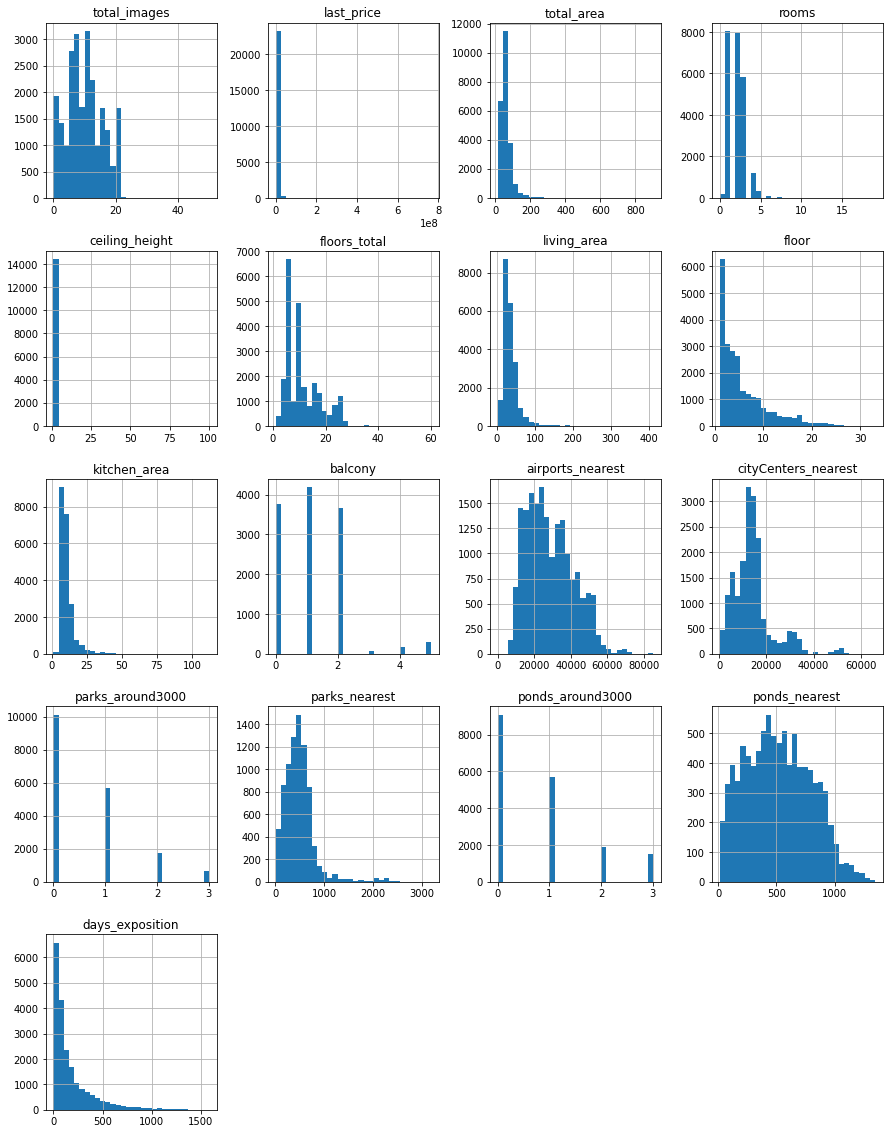

In [9]:
data.hist(bins=30,figsize=(15, 20))
plt.show()

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data.isnull().sum()

In [ ]:
data['balcony'] = data['balcony'].astype('int64') # изменяю на верный тип данных

In [ ]:
data['balcony'].value_counts()

 заменила все NaN в столбце 'balcony' на 0, т.к. если количесво балконов не указано, то скорей всего их нет в квартире

In [ ]:
data['is_apartment'].head(10)

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [ ]:
data.isnull().sum()

In [ ]:
data['is_apartment'].value_counts()


Т.к. апартаменты - это нежилая коммерческая недвижимость, которая внешне ничем не отличаются от квартиры, поэтому помещение либо является апартаментами, либо нет.

In [ ]:
data['is_apartment'] = data['is_apartment'].astype('bool') # изменяю на верный тип данных

In [ ]:
data['is_apartment'].head(10)

In [ ]:
data.dropna(subset = ['locality_name'], inplace = True)


In [ ]:
data.isnull().sum()

In [ ]:
data['locality_name'].value_counts()

Удалила пропуски в название населённого пункта, потому что их меньше 5%

In [ ]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].unique()

Исправила ошибки в наименованиях городов

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('поселок мурино', 'мурино')
data['locality_name'].unique()
    
   
        


In [ ]:
data['locality_name'].value_counts().head(20)

In [ ]:
data.dropna(subset = ['floors_total'], inplace = True)
data.isnull().sum()

In [ ]:
data['floors_total'].value_counts()

Удалила пропуски в колличестве этажей в доме, потому что их меньше 5%

In [ ]:
data['floors_total'] =  data['floors_total'].astype('Int64') # изменяю на верный тип данных

In [ ]:
data['floors_total'].value_counts()

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')# изменяю формат времени на более удобный

In [ ]:
data['first_day_exposition'].value_counts()

In [ ]:
data['last_price'] = data['last_price'].astype('int64')# изменяю на верный тип данных

In [ ]:
data['last_price'].value_counts()

In [ ]:
data.info()

Изменила типы данных, потому что в этих стобцах было несоотвие типа данных и значиний в стобцах

Необходимо проверить выбросы и разобрать каждый столбец:

In [ ]:
data.describe()

Проверка столбца ceiling_height:

In [ ]:
data.hist('ceiling_height',bins=30,range=(0,7))

In [ ]:
data.query('ceiling_height > 0 and ceiling_height <= 2.5')['ceiling_height'].count()
data.query('ceiling_height > 2.5 and ceiling_height <= 7')['ceiling_height'].count()
data.query('ceiling_height > 8 and ceiling_height <= 24')['ceiling_height'].count()
data.query('ceiling_height > 25 and ceiling_height <= 32')['ceiling_height'].count()

Проверила высоту потолков в квартирах. До 2,5 м думаю, что не стоит рассматривать и стоит удалить, они не подходят под норму, так же как и потолки выше 7 м (бывают 2х этажные квартиры). Высоты потолков от 25 до 32, скорей всего опечатка и их значение 2.5 м и 3.2 м, необходимо заменить на верные значения. 

In [ ]:
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 32)]['ceiling_height']/10)
data.query('ceiling_height > 25 and ceiling_height <= 32')['ceiling_height'].count()

In [ ]:
data['ceiling_height'].value_counts()

In [ ]:
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)
data.drop(index=data.query('ceiling_height > 7').index,inplace=True)


In [ ]:
data.hist('ceiling_height',bins=30,range=(2.5,7))

total_images - выглядит вполне правдоподобным


Столбец last_price: 

In [ ]:
data.query('last_price == 0')['last_price'].count() # 0 квартир по стоимости 0
data.query('last_price < 100000')['last_price'].count() # есть 1 квартира по стоимости до 100 000, в дальнейшем ее учитывать не буду и удалю
data.query('last_price >= 100000 and last_price <= 1000000')['last_price'].count() # 224 квартиры в градации до 1 000 000, с них можно начинать анализ
data.query('last_price >= 1000001 and last_price <= 10000000')['last_price'].count() # 20541 квартира по стоимости от 1 000 001 до 10 000 000
data.query('last_price >= 10000001 and last_price <= 100000000')['last_price'].count() # 2659 элитных квартира 
data.query('last_price > 100000000')['last_price'].count() # 37 элитных квартира стоимостью выше 100 000 000, их учитывать не буду и сделаю фильтр на суммы от 100 001 до 100 000 000

In [ ]:
data.drop(index=data.query('last_price < 100000').index,inplace=True)
data.drop(index=data.query('last_price > 100000000').index,inplace=True)


In [ ]:
data.hist('last_price', bins=50, range=(100000, 100000000))

In [ ]:
data['last_price'].value_counts()

Столбец total_area:

Необходимо проверить наличие квартир от 15 кв.м (нормальная студия, приспособленная для жизни от 15 кв.м), и свыше 500 кв.м т.к. является слишкой редкой даже для элитной недвидимости  

In [ ]:
data.query('total_area < 15')['total_area'].count() # всего 6 квартир до 15 кв.м их можно удалить
data.query('total_area >= 15 and total_area <= 100')['total_area'].count() # 21656 квартир с площадью до 100 кв.м
data.query('total_area >= 100 and total_area <= 500')['total_area'].count() # 1850 квартиры с площадью до 500 кв.м
data.query('total_area > 500')['total_area'].count() # 3 квартиры с площадью больше 500 кв.м, их можно не учитывать и удалить

In [ ]:
data.drop(index=data.query('total_area < 15').index,inplace=True)
data.drop(index=data.query('total_area > 500').index,inplace=True)


In [ ]:
data.hist('total_area', bins=50, range=(0,500))

In [ ]:
data['total_area'].value_counts()

Столбец rooms:

194 квартиры с колличествои комнат 0. По моему мнению - это не выброс, т.к. есть квартиры студии и открытая планиовка, где изначально нет комнат или помещение пока не распределено на комнаты. Максимальное значение 19 комнат, мне кажется, что такое значение реально, учитывая что плошадь квартиры может быть больше 500 кв.м, но такое колличесво очень редкое, потому удалю все значения, где больше 6 комнат 


In [ ]:
data.query('rooms == 0')['rooms'].count() # 194 квартиры с колличествои комнат 0. Необходимо проверить выброс это или нет
data.query('rooms == 0 and studio')['rooms'].count() # 135 квартир студий
data.query('rooms == 0 and open_plan')['rooms'].count() # 59 квартир свободной планировки
data.query('rooms > 6')['rooms'].count() # 80 квартир, где больше 6 комнат

In [ ]:
data.drop(index=data.query('rooms > 6')['rooms'].index,inplace=True)

In [ ]:
data.hist('rooms', bins=50, range=(0,7));

In [ ]:
data['rooms'].value_counts()

Столбец floors_total:

 Одноэтажные дома не являются аномалией и имеют место быть. Так же как и небоскребы, которых очень мало и могут помешать определять среднее значение.

In [ ]:
data.query('floors_total == 1')['floors_total'].count() # 23 одноэтажных дома
data.query('floors_total > 1 and floors_total <= 35')['floors_total'].count() #23327 домой до 35 этажей
data.query('floors_total > 35')['floors_total'].count() # 5 небоскребов, можно удалить)

In [ ]:
data.drop(index=data.query('floors_total > 35').index,inplace=True)

In [ ]:
data.hist('floors_total', bins=30)

In [ ]:
data['floors_total'].value_counts()

Столбец living_area:

В столбце имеются данные квартир меньшу 10 кв.м и больше 200, но среднее значение от 10 до 60

In [ ]:
data.query('living_area < 10')['living_area'].count() # 25 квартир с жилой плошадью меньше 10, можно удалить 
data.query('living_area > 10 and living_area < 100')['living_area'].count() # 21187 квартир с жилой плошадью от 10 до 100
data.query('living_area > 100 and living_area < 200')['living_area'].count() # 246 элитных квартир с жилой плошадью от 100 до 200
data.query('living_area > 200')['living_area'].count() # 7 квартир с жилой плошадью больше 200, можно удалить 

In [ ]:
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)


In [ ]:
data.hist('living_area', bins=30)

In [ ]:
data['living_area'].value_counts()

Столбец floor:

В этом столбце нет аномалий

In [ ]:
data.query('floor == 0')['floor'].count() # 0 значений с нулевыми этажами
data.query('floor > 35')['floor'].count() # 0 значений с этажами выше 35

In [ ]:
data.hist('floor',bins=20)

In [ ]:
data['floor'].value_counts()

Столбец kitchen_area:

Большая часть кухонь с площадью до 15 кв м

In [ ]:
data.query('kitchen_area < 2')['living_area'].count() # 1 кухня меньше 2 кв м, похоже на ошибку, можно удалить
data.query('kitchen_area >= 5 and kitchen_area <= 15')['living_area'].count() # 18415 кухнь до 15 кв м
data.query('kitchen_area > 15 and kitchen_area <= 50')['living_area'].count() # 2146 кухнь до 50 кв м
data.query('kitchen_area > 50')['living_area'].count() # 32 очень большие кухни, явно. расположены в очень больших квартирах, которые я отфильтровала, удалю и это


In [ ]:
data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

In [ ]:
data.hist('kitchen_area', bins=50)

In [ ]:
data['kitchen_area'].value_counts()

Столбец balcony: 

Аномалий нет

In [ ]:
data.hist('balcony', bins=10)

Столбец airports_nearest:

Аномалий нет, кроме одной, которую я удалила

In [ ]:
data.query('airports_nearest < 2000')['airports_nearest'].count() # 1 квартира находится в аэропорту, что то тут не так, стоит удалить)
data.drop(index=data.query('airports_nearest < 2000').index,inplace=True)

In [ ]:
data.hist('airports_nearest', bins=10)

In [ ]:
data['airports_nearest'].value_counts()

Столбец city_centers_nearest:

Аномалий нет

In [ ]:
data.hist('city_centers_nearest', bins=10)

In [ ]:
data['city_centers_nearest'].value_counts()

Столбец parks_around3000:

Аномалий нет

In [ ]:
data.hist('parks_around3000', bins=10)

In [ ]:
data['parks_around3000'].value_counts()

Столбец parks_nearest: 

Аномалий нет

In [ ]:
data.hist('parks_nearest', bins=10)

In [ ]:
data['parks_nearest'].value_counts()

Столбец ponds_around3000:

Аномалий нет

In [ ]:
data.hist('ponds_around3000', bins=10)

In [ ]:
data['ponds_around3000'].value_counts()

Столбец ponds_nearest:

Аномалий нет

In [ ]:
data.hist('ponds_nearest', bins=50)

In [ ]:
data['ponds_nearest'].value_counts()

Столбец days_exposition:

В принципе, все хорошо, только удалила те обьявления, которые слишком долго висят на сайте, могут помешать исследованию

In [ ]:
data.query('days_exposition > 365*3')['days_exposition'].count() # 163 обьявления, которые провисели на продаже больше 3х лет
data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)

In [ ]:
data.hist('days_exposition', bins=100)

In [ ]:
data['days_exposition'].value_counts()

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data.head(10)

In [ ]:
data.duplicated().sum()

Вывод по разделу:
В принципе, данные достаточно качественные. Выбросов удаляла не очень много, заменила всего 1 название столбца, заменила несколько типов по столбцам, многие столбцы вообще не подвергала изменениями, пропусков в строках не много и большинство не поддаюся удалению или изменениям, т.к. неизвестны эти данные, да и заменять вычислениями смысла нет. Явных дубликатов нет, сложно определить этот момент, т.к. не понятно дубликат это или еще одно значение. В целом, было интересно)
    

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра:

In [ ]:
data['cost_square_metre'] = data['last_price'] / data['total_area']
data['cost_square_metre'].head(10)

In [ ]:
data.head(10)

День недели публикации объявления:

In [ ]:
data['day_week_exposition'] = data['first_day_exposition'].dt.weekday
data['day_week_exposition'].head(10)

Месяц публикации объявления:

In [ ]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data['month_exposition'].head(10)

Год публикации объявления:

In [ ]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data['year_exposition'].head(10)

Тип этажа квартиры: 

In [ ]:
def type_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['type_floor'] = data.apply(type_floor, axis = 1)
data['type_floor'].unique()

    
    

Расстояние до центра города в километрах:

In [ ]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data['city_centers_nearest_km'].head(10)

In [ ]:
data.info()

### Проведите исследовательский анализ данных

In [ ]:
data.head(20)

In [ ]:
data.hist('total_area', bins=100, range=(0, 300))

Наблюдаем очень малое количество квартир с общей площадью более 100 кв.м

In [ ]:
data.hist('living_area', bins=100)

Наблюдается 2 пика: 1.квартиры примерно по 18 кв м. 2.квартиры от 25 до 50 кв м. Если обратить внимание на гистограму столбца rooms, то будет понятно, что продаются в основном 1-2 х комнатные квартиры, они как раз и имеют такой размер жилой площади

In [ ]:
data.hist('kitchen_area', bins=100)

Кухни в большинсве продаваемых квартир до 10 кв м 

In [ ]:
data.hist('last_price', bins=50)

Цены высокие))) Длинный хвост говорит, что цены на элиьную недвижимость еще выше)

In [ ]:
data.hist('rooms', bins=10)

В основном продают 1-2 комнатные квартиры, 3 х комнатных немного меньше

In [ ]:
data.hist('ceiling_height', bins=10)

Большинство потолков 2,5-2,7 м

In [ ]:
data.hist('floor', bins=50)

Большинство квартир находятся до 5 го этажа, но это и понятно, ибо большинство домов имеют высоту 5 - 10 этажей

In [ ]:
data.groupby(by='type_floor')['type_floor'].count().plot(kind='bar', ylabel = 'count')

В большинтво квартир находятся не на 1м и не на последних этах, да и других этажей больше по числу, чем первых и последних

In [ ]:
data.hist('floors_total', bins=10)

Большинство домов 5ти- 10 этажные, в Питере мало очень высоких домов

In [ ]:
data.hist('city_centers_nearest', bins=100)

Питер сейчас разрастается, новые районы появляются в ближайшей области в 10-20 км от центра

In [ ]:
data.hist('airports_nearest', bins=50)

График очень шумный, расстояния до аэропота рызные. Но большинство объектов недвижимости расположены в 10-20 км от него

In [ ]:
data.hist('parks_nearest', bins=100)

В Питере не только пить, но и гулять в парке, которых очень много не только в самом городе, но и за его пределами. Гистограмма говорит о том же, что в большинстве случаев парки находятся близко к объектам недвижимости, в большинстве случаев 500м  

In [ ]:
data.hist('day_week_exposition', bins=7)

Видны провалы по выложенным объявлениям в выходнеы дни, видимо, риелторы отдыхают))

In [ ]:
data.hist('month_exposition', bins=20)

Видны провалы по выложенным объявлениям в январе(из-за новогодних каникул), в мае (из-за майских каникул) и в декабре (перед каникулами новогодними). Так же меньше объявлений наблюдается в летний период. Основными рабочими месяцами являеюся февраль - апрель.

Сколько времени обычно занимает продажа?

In [ ]:
data.hist('days_exposition', bins=100)

In [ ]:
data.hist('days_exposition', bins=100, range = (0,180))

In [ ]:
data['days_exposition'].mean() # 171 день в среднем занимает продажа квартиры
data['days_exposition'].median() # 93 день - медианное время продажи квартиры

In [ ]:
data['days_exposition'].describe()

In [ ]:
data.boxplot(column='days_exposition')


Продажа квартиры дело не быстрое, но некоторые квартиры разлетаются как "горячие пирожки", за 45 - 60 дней можно продать квартиру и это считается "быстрыми продажи". А долгими все, что больше полугода - 180 дней, некоторые квартиры продаются годами, это видно из длинного хвоста гистограммы, необычно долгими можно считать продажи свыше года.

Какие факторы больше всего влияют на общую (полную) стоимость объекта?


In [ ]:
data['last_price'].corr(data['total_area']) 

In [ ]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1, grid = True)

0.75 -  показывает высокое влияение общей площади квартиры на ее стоимость

In [ ]:
data['last_price'].corr(data['living_area']) 

In [ ]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1, grid = True)

0.66 - чем больше жилая площадь, тем выше стоимость, ну и естественно будет выше общий размер квартиры. Так что, чем больше квадратов, тем больше стоимость

In [ ]:
data['last_price'].corr(data['kitchen_area']) 

In [ ]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1, grid = True)

0,56 - тот же принцип, что и в предыдущих: чем больше квадратных метров в квартире, тем больше стоимость ее

In [ ]:
data['last_price'].corr(data['rooms']) 

In [ ]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar')

чем больше комнат, тем выше стоимость

In [ ]:
data.pivot_table(index='type_floor',values='last_price').


1й и последний этаж всегла не в почете у покупателей из-за технических особенностей дома, но по графику видно, что разница не большая в стоимости между последним и другими этажами 

In [ ]:
data['last_price'].corr(data['year_exposition']) 

In [ ]:
data.pivot_table(index='year_exposition',values='last_price').plot(y='last_price', kind='bar')

In [ ]:
data['last_price'].corr(data['day_week_exposition']) 

In [ ]:
data.pivot_table(index='day_week_exposition',values='last_price').plot(y='last_price', kind='bar')

In [ ]:
data['last_price'].corr(data['month_exposition']) 

In [ ]:
data.pivot_table(index='month_exposition',values='last_price').plot(y='last_price', kind='bar')

По очень низкой положительной и вообще отрицательной кореляции видно, что зависимости стоимости квартир от дат размещения объявлений нет. 

Вывод:
Цена на квартиры зависит от: общей площади, жилой площади, площади кухни, количества комнат.
Ценообразование почти  не зависит от: этажа, на котором расположена квартира, даты размещения объявления.

Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [ ]:
kv_10 = data.pivot_table(index='locality_name', values='cost_square_metre' ,aggfunc=['mean', 'count']).round()
kv_10.columns=['mean','count']
kv_10.sort_values(by="count",ascending = False).head(10)

Самая высокая стоимость квадратного метра в г.Санкт-Петербург. Самая низкой стоимостью квадратного метра в Выборге

Стоимость расстояния до центра в километрах.

In [ ]:
data[data['locality_name']=='санкт-петербург'].pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')\
    .plot(kind='bar', title = 'Стоимость расстояния до центра в километрах');

Дороже всего недвижимость в центре, пик на графике на 0 км, поднимается выше всех. На 2 м месте стоимость недвижимости на расстоянии от 1 др 7 км. От 9 км от центра стоимоть кватир стабилизиуется и примерно одинакова аж до 26 км от центра. На 27 км тоже пик, возможно, чьи то элитные дачи)

### Общий вывод

По данному проекту была проделана большая работа:
1. Выполнение предобработки данных:
   - Определение пропусков в столбцах и заполнение их там, где это возможно
   - Поиск дубликатов
   - Корректировка типов данных столбцов
   - Изучение уникальных значений в столбцах и устраните неявные дубликатов
   - Устраните редких и выбивающихся значений
2. Добавление новых столбцов в датафрейм для более детального изучения вопроса
3. Проведение исследовательского анализа данных:
   - Изучение всех параметров объектов, указанных в датафрейме и построение графиков
   - Проверка влияния различных параметров на ценообразование квартир
   - Исследование скорости продажи квартир
   - Подсчет средней цены одного квадратного метра и вывод 10 населенных пунктов с самыми дорогими квартирами
   - Исследование влияния на ценообразование удаленности объектов недвижимости от центра Санкт-Петербурга

Изучив полученные данные, я сделала вывод:

Стоимость квартир напрямую зависит от: 
    1.территориального расположения объекта недвижимости
    2.общей площади квартиры и жилой
    3.площади кухни
    4.количества комнат
Дороже всего недвижимость в самом центре г.Санкт-Петербург. На 2 м месте стоимость недвижимости на расстоянии от 1 до 7 км от центра. От 9 км от центра стоимоть кватир стабилизиуется и примерно одинакова аж до 26 км от центра. Большинство домой не превышают 10 этажей, Квартиры имеют размер до 100 кв м с небольшими кухнями до 15 кв м, большинство 1-2х комнатные.
Почти в любом из имеющихся населенных пунктов, будут парки и озера рядом с домом. Так же большинсво населенных пунктов имеют хорошую доступность до аэропорта (в среднем до 50км).  
Продать квартиру можно в срок до полугода, но в некоторых случаях продажа затянется и на дольше, а то и на несколько лет. Причем не важно когла было выложено объявление, день и месяц почти не влияет на это.
